# CS 156a - Problem Set 3

### Patrone Samuel, 2140749

The following notebook is publicly available at https://github.com/spatrone/CS156A-Caltech.git.

## Problems 1-3

### Answers:  [b] $1000$,  [c] $1500$, [d] $2000$

### Derivation:

We want to determine what is the least number of samples $N$ needed for different number of hypothesis $M$ such that the Hoeffding bound $B=0.05$, setting the tolerance $\epsilon=0.03$.
To evaluate this number, it is sufficient to invert the formula of the bound, i.e.

$$
2 M e^{-2\epsilon^2 N} = B \rightarrow N=-\frac{1}{2\epsilon^2}\log\left(\frac{B}{2 M}\right)\,.
$$

In [12]:
import numpy as np
import math as m

def N(M,B=0.03,eps=0.05):
    N=-1/(2*eps**2)*m.log(B/(2*M))
    print('The number of samples needed to satisfy the Hoeffding probability bound of',B,'with a tolerance of',eps,'is',int(N), 'for M=',M,'\n')

N(1)
N(10)
N(100)

The number of samples needed to satisfy the Hoeffding probability bound of 0.03 with a tolerance of 0.05 is 839 for M= 1 

The number of samples needed to satisfy the Hoeffding probability bound of 0.03 with a tolerance of 0.05 is 1300 for M= 10 

The number of samples needed to satisfy the Hoeffding probability bound of 0.03 with a tolerance of 0.05 is 1760 for M= 100 



## Problem 4

### Answer:  [b] 5

### Derivation:

A break point $k$ for an hypothesis set $\mathcal{H}$ is defined as the minimum number of points that cannot be shattered by $\mathcal{H}$. In other words, it doesn't exist any set of $k-$points for which the hypothesis set is able to reproduce all the $2^k$ possible classifications. 

We now investigate the break point for the Perceptron model in $3D$.

We first observe that it is always possible to find a set of $4$ points that can be completely shattered by the Perceptron. Take the fourth point to be not co-planar with the other three: we will call the plane defined by the first three points $\Sigma$ in the following. 
The intersection of our classification plane (not co-planar with the first three points) with $\Sigma$ is a line and we already know a line can completely shatter three points on a plane. Furthermore, we can tilt the angle of the plane to reproduce both possible classifications for the $4$th point. Since we found a configuration of $4$ points that can be shattered by a plane in $3D$, the break point for the $3D$ Perceptron must be at least $5$.

We now give a geometric proof that the break point for the $3D$ Perceptron is $5$. Without loss of generality, we take the five points to be not-coplanar. We choose four of them in order to make a tetrahedron such that the fifth point lay outside of it, within the partition of the space identified by one of the faces of the tetrahedron $\Sigma^\prime$. We label the point outside the tetrahedron $5$, the three points that define $\Sigma^\prime$ as $2,3,4$ and the opposite point $1$. The dichotomy $\{+1,-1,-1,-1,+1\}$, cannot be realized by any plane, since the portion of space delimited by any classification plane which separate all the points of $\Sigma^\prime$ from point $1$, will also include by construction point $5$, attributing to point $5$ the same classification value as points $2,3,4$. Hence, the break point for the $3D$ Perceptron is $5$.

See attached some explanatory drawings.

In [13]:
from IPython.display import Image
Image(url= "IMG_0163.jpg", width=400, height=400)

## Problem 5

### Answer:  [b] i,ii,v

### Derivation:

A growth function $m_{\mathcal{H}}(N)$ is well defined if one of the two following conditions are satisfied:

- $m_{\mathcal{H}}(N)= 2^N$ for any N, or
- $m_{\mathcal{H}}(N)$ is a polynomial function of N such that $m_{\mathcal{H}}(N)\le 2^N$ for any $N$.

In the following, we verify the proposed functions.

- i) $f_1(N)=1+N \le 2^N$ OK!

- ii) $f_2(N)=1+N+{N\choose 2}=1+N+\frac{N!}{2!N-2!}=1+N+\frac{N!}{2!N-2!}=1+N+\frac{N(N-1)}{2}=1+\frac{N(N+1)}{2}\le 2^N$ OK!

- iii) $f_3(N)=\sum^{[\sqrt{N}]}_{i=1} {N\choose i} \ge \sum^{[\sqrt{N}]}_{i=0}{[\sqrt{N}]\choose i}-1=2^{[\sqrt{N}]}-1$. Hence, $f_3(N)$ is greater than a non-polynomial function in N, although smaller than $2^N$ for $N\ge 1$. KO!

- iv) $f_4(N)=2^{[N/2]}$. Again, it is a non-polynomial function smaller than $2^N$ for $N\ge 1$.  KO!

- v) $f_5(N)=2^{N}$. Trivially, this is a valid growth function. OK!

## Problem 6

### Answer:  [c] 5

### Derivation:

2-intervals hypothesis set can shatter completely a data set of four points: this is because two intervals are able to reproduce all the dichotomies for which the classification value of adjacent points doesn't flip more than three times.

With 5 points we can easily conceive a dichotomy which is not reproduced by the 2-intervals hypothesis set, in which the classification values flip four times between adjacent points, e.g. $\{+1,-1,+1,-1,+1\}$. Therefore, the break point for the 2-intervals hypothesis set is 5.

## Problem 7

### Answer:  [c] ${N+1\choose4}+{N+1\choose2}+1$ 

### Derivation:

In the following, we will prove the expression for the growth function for the most generic $M-$intervals hypothesis set.
We notice that given $N$ points, the line is split by the points into $N+1$ different regions. The dichotomy is fixed once we decide by which $2M$ regions contain the end values of the $M$ intervals. If all the ends of all the intervals do not overlap, there are $N+1\choose2M$ possible different dichotomies. If any two intervals are overlapped (i.e. two of their ends happens to be in the same region), they count as one, then the number of possible choices reduces to $N+1\choose2(M-1)$. This recursively until we get the trivial hypothesis where both of the ends of all the intervals collapse in the same region. In formulae:

$$
\label{growthfunc}
m_{\mathcal{H}(M)}(N)=\sum^M_{k=0} {N+1\choose2 k}\,.
$$

For $M=2$ case, we get:

$$
m_{\mathcal{H}(2)}(N)=\sum^2_{k=0} {N+1\choose2 k}={N+1\choose4}+{N+1\choose2}+1\,.
$$

## Problem 8

### Answer:  [d] $2M+1$ 

### Derivation:

Generalizing the result of Problem 6, we notice that for the $M-$intervals model, we need at least $M+1$ flips of classification value between adjacent points to reproduce a dichotomy that cannot be generated by the model.
To do that, we need at least $N=2(M+1)-1$ points, since the last point can be classified as the first. Therefore, $k=2M+1$.
We can explicitly verify this result by studying the growth function defined above in Eq.$\,\eqref{growthfunc}$ behavior as a function of $M$.

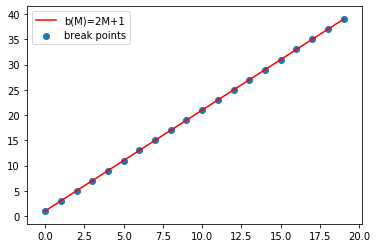

47

In [51]:
import scipy.special
import matplotlib.pyplot as plt

def growth_func(M,N):
    m=0
    for i in range(M+1):
       m+=scipy.special.binom(N+1,2*i)
    return np.int(m)

def break_point(growth_func, M):
    brk_pt=False
    N=0
    while(brk_pt==False):
        brk_pt=(growth_func(M,N)<2**N)
        N+=1
    return N-1
        
xrange=np.array(range(20))
bpts=[break_point(growth_func, xrange[i]) for i in xrange]
plt.plot(xrange,2*xrange+1, label="b(M)=2M+1", color='red')
plt.scatter(xrange, bpts,label='break points')
plt.legend()
plt.show()

growth_func()